<a href="https://colab.research.google.com/github/galacticism/Predicting-Recidivism-With-Machine-Learning-An-Analysis-of-Risk-Factors/blob/main/Model_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NIJ_s_Recidivism_Dataset - NIJ_s_Recidivism_Dataset.csv to NIJ_s_Recidivism_Dataset - NIJ_s_Recidivism_Dataset.csv


In [ ]:
df = pd.read_csv('/content/NIJ_s_Recidivism_Dataset - NIJ_s_Recidivism_Dataset.csv')

#**Georgia Dataset**


##**Initial Exploration**

In [ ]:
#Finding the average jobs per year for each age group
grp = df.groupby('Education_Level')
print("less than HS diploma: ", grp.get_group('Less than HS diploma')['Jobs_Per_Year'].mean())
print("high school diploma: ", grp.get_group('High School Diploma')['Jobs_Per_Year'].mean())
print("at least some college: ", grp.get_group('At least some college')['Jobs_Per_Year'].mean())

less than HS diploma:  0.694457014618576
high school diploma:  0.8149773208175097
at least some college:  0.8179396648841815


In [ ]:
#Finding the average supervision risk score for each race
grp2 = df.groupby('Race')
print('Black: ', grp2.get_group('BLACK')['Supervision_Risk_Score_First'].mean())
print('White: ', grp2.get_group('WHITE')['Supervision_Risk_Score_First'].mean())

Black:  6.162833802430151
White:  5.973408690818123


In [ ]:
#Finding the average percentage of days employed for each education level
grp3 = df.groupby('Education_Level')
print('less than HS diploma: ', grp3.get_group('Less than HS diploma')['Percent_Days_Employed'].mean())
print('high school diploma: ', grp3.get_group('High School Diploma')['Percent_Days_Employed'].mean())
print('at least some college: ', grp3.get_group('At least some college')['Percent_Days_Employed'].mean())

less than HS diploma:  0.4353681638404046
high school diploma:  0.49753603202518915
at least some college:  0.5461568399712424


##**Effect of Education Level on Recidivism**

In [ ]:
grp4 = df.groupby('Education_Level')
less = grp4.get_group('Less than HS diploma')['Recidivism_Within_3years']

In [ ]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, subplot_titles=("Less than HS diploma", "High School Diploma", "At least some college"), y_title='Percentage')

fig.add_trace(go.Bar(x=['Recidivated', 'Did not recidivate'], y = (grp4.get_group('Less than HS diploma')['Recidivism_Within_3years'].value_counts(normalize=True)), marker=dict(color=[4, 5, 6])),
              1, 1)

fig.add_trace(go.Bar(x=['Recidivated', 'Did not recidivate'], y = (grp4.get_group('High School Diploma')['Recidivism_Within_3years'].value_counts(normalize=True)), marker=dict(color=[4, 5, 6])),
              1, 2)

fig.add_trace(go.Bar(x=['Recidivated', 'Did not recidivate'], y = (grp4.get_group('At least some college')['Recidivism_Within_3years'].value_counts(normalize=True)), marker=dict(color=[4, 5, 6])),
              1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, title_text="Recidivism for Different Education Levels", title_x=0.5)
fig.update_xaxes(title_font_family="Arial")
fig.show()

##**Relationship between Jobs Per Year, Age at release, and Recidivism**

In [ ]:
recidivated = []
did_not_recidivate = []
grp = df.groupby(['Age_at_Release', 'Recidivism_Within_3years'])

#for those who recidivated in each age group, appending the average jobs per year to 'recidivated'
#for those who did not recidivate in each age group, appending average jobs per year to 'did_not_recidivate'

for x in ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older']:
  recidivated.append(grp.get_group((x, True))['Jobs_Per_Year'].mean())
for y in ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older']:
  did_not_recidivate.append(grp.get_group((y, False))['Jobs_Per_Year'].mean())

In [ ]:
#creating a dataframe with the columns necessary for the graph
jobs_per_ind = pd.DataFrame({'Age': ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older'],
                             'Recidivated': recidivated,
                             'Did_Not_Recidivate': did_not_recidivate},
                              columns = ['Age', 'Recidivated', 'Did_Not_Recidivate'])

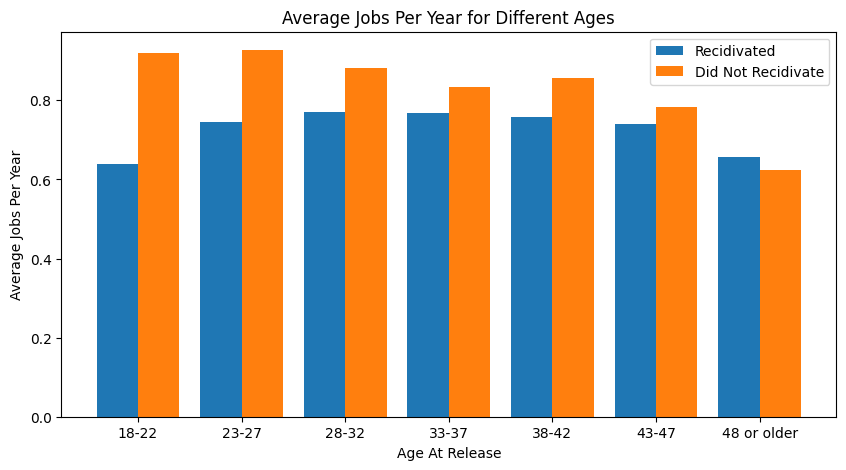

In [ ]:
X_axis = np.arange(len(jobs_per_ind['Age']))

plt.figure(figsize=(10,5))

plt.bar(X_axis-0.2, jobs_per_ind['Recidivated'], 0.4, label = 'Recidivated')
plt.bar(X_axis+0.2, jobs_per_ind['Did_Not_Recidivate'], 0.4, label = 'Did Not Recidivate')
plt.xticks(X_axis, jobs_per_ind['Age'])

plt.xlabel("Age At Release")
plt.ylabel("Average Jobs Per Year")
plt.title("Average Jobs Per Year for Different Ages")

plt.legend(loc='best')

##**Relationship between Percent Days Employed, Age at release, and Recidivism**

In [ ]:
recidivated2 = []
did_not_recidivate2 = []
grp2 = df.groupby(['Age_at_Release', 'Recidivism_Within_3years'])

#for those who recidivated in each age group, appending the average percent days employed to 'recidivated2'
#for those who did not recidivate in each age group, appending average percent days employed to 'did_not_recidivate2'

for x in ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older']:
  recidivated2.append(grp2.get_group((x, True))['Percent_Days_Employed'].mean())
for y in ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older']:
  did_not_recidivate2.append(grp2.get_group((y, False))['Percent_Days_Employed'].mean())

In [ ]:
#creating a dataframe with the columns necessary for the graph
percent_employed_ind = pd.DataFrame({'Age': ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older'],
                             'Recidivated': recidivated2,
                             'Did_Not_Recidivate': did_not_recidivate2},
                              columns = ['Age', 'Recidivated', 'Did_Not_Recidivate'])

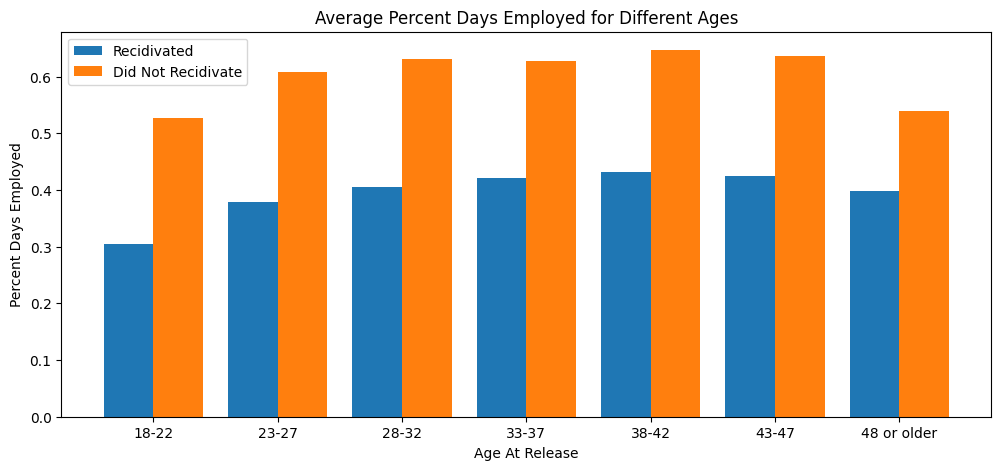

In [ ]:
X_axis = np.arange(len(percent_employed_ind['Age']))

plt.figure(figsize=(12,5))

plt.bar(X_axis-0.2, percent_employed_ind['Recidivated'], 0.4, label = 'Recidivated')
plt.bar(X_axis+0.2, percent_employed_ind['Did_Not_Recidivate'], 0.4, label = 'Did Not Recidivate')
plt.xticks(X_axis, percent_employed_ind['Age'])

plt.xlabel("Age At Release")
plt.ylabel("Percent Days Employed")
plt.title("Average Percent Days Employed for Different Ages")

plt.legend(loc='best')

#**Data Cleaning**


In [ ]:
# Stripping " or more" from the following columns and converting values to integers
for i in ['Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
    'Prior_Arrest_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Prior_Conviction_Episodes_Prop',
    'Prior_Conviction_Episodes_Drug', 'Delinquency_Reports', 'Program_Attendances', 'Residence_Changes', 'Dependents']:
    df[i] = df[i].astype(str)
    df[i] = df[i].str.strip(' or more').astype(int)

In [ ]:
# Changing the "48 or older" to a range by replacing ' or older' with the avg life expectancy in Georgia
df['Age_at_Release'] = df['Age_at_Release'].replace('48 or older', '48-72')

In [ ]:
#Converting True or False values to 1 or 0
for col in ['Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_Viol',
            'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges', 'Prior_Conviction_Episodes_GunCharges',
            'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed', 'Condition_Other', 'Employment_Exempt',
            'Recidivism_Within_3years']:
            df[col] = df[col].replace({True: 1, False: 0})

In [ ]:
#converting Supervision_Level from Standard, Specialized, and High to 0, 1, and 2 respectively
df['Supervision_Level_First'] = df['Supervision_Level_First'].replace({'Standard':0, 'Specialized':1, 'High':2})

In [ ]:
#Converting Education Level from Less than HS diploma, High School Diploma, At least some college to 0, 1, and 2
df['Education_Level'] = df['Education_Level'].replace({'Less than HS diploma':0, 'High School Diploma':1, 'At least some college':2})

In [ ]:
df['Gender'] = df['Gender'].replace({'M':0, 'F':1})
df['Race'] = df['Race'].replace({'BLACK':0, 'WHITE':1})

In [ ]:
#Converting the Age At Release to the lower bound of the range & converting to integers
df['Age_at_Release'] = df['Age_at_Release'].str.split("-", 1, expand = True)[0]
df['Age_at_Release'] = df['Age_at_Release'].astype(int)

<ipython-input-10-c0135cc48708>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Age_at_Release'] = df['Age_at_Release'].str.split("-", 1, expand = True)[0]


In [ ]:
#Converting categorical columns to integers
df['Prison_Years'] = df['Prison_Years'].replace({'More than 3 years':3, '1-2 years':1.5, 'Less than 1 year':1, 'Greater than 2 to 3 years':2})

In [ ]:
correlation = df.corr()
#correlation.style.background_gradient(cmap = 'BrBG').set_precision(2)

<ipython-input-12-246b669a5e5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
correlation['Recidivism_Within_3years']

ID                                                  -0.007316
Gender                                              -0.091976
Race                                                -0.023436
Age_at_Release                                      -0.177230
Residence_PUMA                                       0.025181
Gang_Affiliated                                      0.185006
Supervision_Risk_Score_First                         0.178494
Supervision_Level_First                              0.102723
Education_Level                                     -0.095131
Dependents                                          -0.031821
Prison_Years                                        -0.134025
Prior_Arrest_Episodes_Felony                         0.196186
Prior_Arrest_Episodes_Misd                           0.176784
Prior_Arrest_Episodes_Violent                        0.067546
Prior_Arrest_Episodes_Property                       0.177012
Prior_Arrest_Episodes_Drug                           0.074633
Prior_Ar

##**Dropping Columns**

In [ ]:
df.drop(['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Program_Attendances', 'Program_UnexcusedAbsences', 'Residence_Changes',
         'Avg_Days_per_DrugTest', 'Recidivism_Arrest_Year3', 'Training_Sample', 'ID', 'Race', 'Residence_PUMA', 'Dependents',
         'Prior_Revocations_Parole', 'Prior_Revocations_Probation', 'Condition_Cog_Ed', 'Condition_Other', 'Violations_ElectronicMonitoring',
         'Violations_Instruction', 'Violations_FailToReport', 'Violations_MoveWithoutPermission', 'Delinquency_Reports', 'Program_Attendances',
         'Residence_Changes', 'Avg_Days_per_DrugTest','Jobs_Per_Year', 'Gender'
        ], axis=1, inplace = True)

In [ ]:
#Combining the prior arrest and conviction columns with similar correlations
df['Prior_Arrest_Conviction_Episodes'] = (df['Prior_Arrest_Episodes_Felony'] + df['Prior_Arrest_Episodes_Misd'] + df['Prior_Arrest_Episodes_Property']+
df['Prior_Arrest_Episodes_PPViolationCharges'] + df['Prior_Conviction_Episodes_Misd'] + df['Prior_Conviction_Episodes_Prop']
)

In [ ]:
#Dropping the prior arrest and conviction columns
df.drop(['Prior_Conviction_Episodes_Misd', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent', 'Prior_Conviction_Episodes_Viol',
         'Prior_Arrest_Episodes_Property', 'Prior_Conviction_Episodes_Prop', 'Prior_Arrest_Episodes_PPViolationCharges',
         'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Arrest_Episodes_DVCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges',
         'Prior_Arrest_Episodes_Felony', 'Prior_Conviction_Episodes_Felony', 'Prior_Arrest_Episodes_GunCharges', 'Prior_Conviction_Episodes_GunCharges',
         'Prior_Arrest_Episodes_Drug', 'Prior_Conviction_Episodes_Drug', 'Employment_Exempt',  'Prior_Arrest_Episodes_Drug',
         'Prison_Offense'],
        axis=1, inplace=True)

In [ ]:
#Dropping drug test columns with low correlations (keeping ones with high correlations)
df.drop(['DrugTests_Cocaine_Positive', 'DrugTests_Meth_Positive', 'DrugTests_Other_Positive'], axis=1, inplace = True)

In [ ]:
#sum of null values in each column
df.isna().sum()

Age_at_Release                         0
Gang_Affiliated                     3167
Supervision_Risk_Score_First         475
Supervision_Level_First             1720
Education_Level                        0
Prison_Years                           0
Condition_MH_SA                        0
DrugTests_THC_Positive              5172
Percent_Days_Employed                462
Recidivism_Within_3years               0
Prior_Arrest_Conviction_Episodes       0
dtype: int64

In [ ]:
#Determining if rows with null values in drug tests should be dropped by seeing if the difference in percentage of recidivism
#between null and non-null values is significant

#List of indices with null values in DrugTests
null_vals = df[df['DrugTests_THC_Positive'].isnull()].index.tolist()
null_val_rec = []
for x in null_vals:
  null_val_rec.append(df.iloc[x]['Recidivism_Within_3years'])
null_val_rec = pd.DataFrame(null_val_rec)

#Percentage of recidivism for non-null values
df1 = df.dropna(subset='DrugTests_THC_Positive')
print('Percentage of recidivism for non-null values: ', df1['Recidivism_Within_3years'].value_counts(normalize=True)[1])
print('Percentage of recidivism for null values: ', null_val_rec.value_counts(normalize=True)[1])

Percentage of recidivism for non-null values:  0.5521947442288148
Percentage of recidivism for null values:  0.6755607115235885


In [ ]:
#Determining if rows with null values in Gang Affiliation should be dropped by seeing if the difference in percentage of recidivism is significant

#List of indices with null values in DrugTests
null_vals2 = df[df['Gang_Affiliated'].isnull()].index.tolist()
null_val_rec2 = []
for y in null_vals2:
  null_val_rec2.append(df.iloc[y]['Recidivism_Within_3years'])
null_val_rec2 = pd.DataFrame(null_val_rec2)

#Percentage of recidivism for non-null values
df2 = df.dropna(subset='Gang_Affiliated')
print('Percentage of recidivism for non-null values: ', df2['Recidivism_Within_3years'].value_counts(normalize=True)[1])
print('Percentage of recidivism for null values', null_val_rec2.value_counts(normalize=True)[1])

Percentage of recidivism for non-null values:  0.5938768307746604
Percentage of recidivism for null values 0.45532049257972845


##**Imputation**

In [ ]:
#Replacing null values based on percentage of True and False for non-null values (Gang Affiliation)

df['Gang_Affiliated'].replace('nan', np.NaN, inplace=True)
df['Gang_Affiliated'].value_counts(normalize=True)

probability = list(df['Gang_Affiliated'].value_counts(normalize=True).values)
df['Gang_Affiliated'] = df['Gang_Affiliated'].apply(lambda x: np.random.choice([0, 1], 1, replace=False, p=probability)[0] if pd.isna(x) else x)

In [ ]:
#imputing drug test data based on distribution of non-null values
s = df['DrugTests_THC_Positive'].value_counts(normalize=True)
missing = df['DrugTests_THC_Positive'].isnull()
df.loc[missing,'DrugTests_THC_Positive'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [ ]:
#Imputing categorical data with mode and numerical with median
df['Supervision_Risk_Score_First'].fillna(df['Supervision_Risk_Score_First'].median(), inplace=True)
df['Supervision_Level_First'].fillna(0, inplace=True)
df['Percent_Days_Employed'].fillna(df['Percent_Days_Employed'].median(), inplace=True)


#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss

In [ ]:
#Splitting into features and label
X = df.drop('Recidivism_Within_3years', 1) #Features
y = df[['Recidivism_Within_3years']] #Label

<ipython-input-25-1e6b2531d1d0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Recidivism_Within_3years', 1) #Features


In [ ]:
#Splitting into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
#fitting model to data
dt = dt.fit(X_train, y_train)

In [ ]:
#making predictions on test data
pred = dt.predict(X_test)

In [ ]:
dt.predict_proba(X_test)

array([[0.22547791, 0.77452209],
       [0.22547791, 0.77452209],
       [0.47629831, 0.52370169],
       ...,
       [0.22547791, 0.77452209],
       [0.36817102, 0.63182898],
       [0.41276912, 0.58723088]])


**Plotting the Decision Tree**

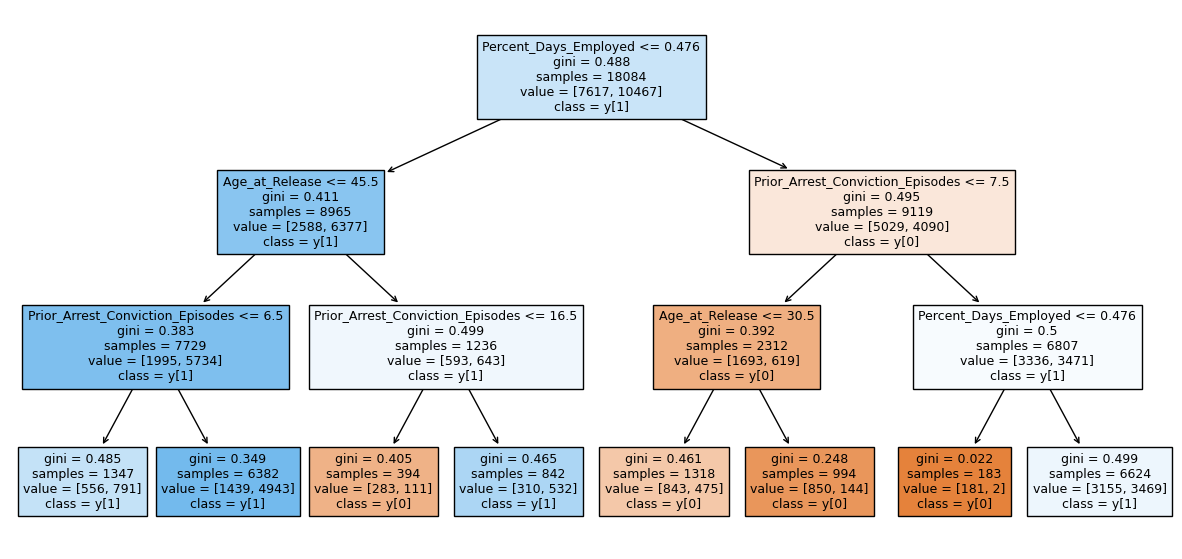

In [ ]:
plt.figure(figsize=(15, 7))
tree.plot_tree(dt, max_depth=3, feature_names=['Age_at_Release','Gang_Affiliated','Supervision_Risk_Score_First','Supervision_Level_First',
'Education_Level','Prison_Years','Condition_MH_SA','DrugTests_THC_Positive', 'Percent_Days_Employed','Prior_Arrest_Conviction_Episodes'],
               class_names = True, label='all', filled=True, fontsize=9)
#filled parameter shows the majority class for each node
plt.show()

##**Metrics**


In [ ]:
#model accuracy
print(metrics.accuracy_score(y_test, pred))

0.6458521481099213


In [ ]:
#Accuracy for different test train splits
splts = [0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
accuracies = []
for s in splts:
  XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=s, random_state=25)
  model = DecisionTreeClassifier(max_depth=3)
  model = model.fit(XX_train, yy_train)
  prediction = model.predict(XX_test)
  accuracies.append(metrics.accuracy_score(yy_test, prediction))
print(accuracies)

[0.6611186375072576, 0.6564483666202199, 0.6458521481099213, 0.641380072984629, 0.6436036384749371, 0.6450197832444521, 0.6438303142901378]


In [ ]:
fig = px.line(x=splts, y=accuracies, title='Model Accuracy for Different Train-Test Splits')
fig.update_layout(xaxis_title = 'Train-Test Split', yaxis_title='Accuracy')
fig.show()


**Changing Parameters**

In [ ]:
#defining a function to determine the log loss for different max_depths
def get_log_loss (max_depth, train_X, test_X, train_y, test_y):
  mod = DecisionTreeClassifier(max_depth=max_depth, random_state=25)
  mod.fit(train_X, train_y) #fitting the model
  preds = mod.predict(test_X)
  loss = log_loss(test_y, mod.predict_proba(test_X))
  return (loss)

In [ ]:
losses = []
depths = [2, 3, 4, 5, 6, 7, 8, 9]
for max_depth in depths:
  my_loss = get_log_loss(max_depth, X_train, X_test, y_train, y_test)
  losses.append(my_loss)
  print("Max Depth = ", max_depth, ", Loss =", my_loss)

Max Depth =  2 , Loss = 0.636148345460576
Max Depth =  3 , Loss = 0.6166762629225337
Max Depth =  4 , Loss = 0.6075150453089546
Max Depth =  5 , Loss = 0.6095200385571888
Max Depth =  6 , Loss = 0.6104880161319135
Max Depth =  7 , Loss = 0.6414397097578117
Max Depth =  8 , Loss = 0.7448179960286543
Max Depth =  9 , Loss = 0.9453327049119503


In [ ]:
fig = px.line(x=depths, y=losses, title='Log Loss for Different Max Depths')
fig.update_layout(xaxis_title = 'max_depth', yaxis_title='Log Loss')
fig.show()

In [ ]:
#Determining the optimal max leaf nodes
def loss_nodes (max_leaf_nodes, train_X, test_X, train_y, test_y):
  mod = DecisionTreeClassifier(max_depth=5, random_state=25, max_leaf_nodes=max_leaf_nodes)
  mod.fit(train_X, train_y)
  preds = mod.predict(test_X)
  loss = log_loss(test_y, mod.predict_proba(test_X))
  return (loss)

In [ ]:
losses_1 = []
max_leaf_node = [5, 50, 500]
for leaf in max_leaf_node:
  my_loss = loss_nodes(leaf, X_train, X_test, y_train, y_test)
  losses_1.append(my_loss)
  print("Max Leaf Nodes = ", leaf, ", Loss =", my_loss)

Max Leaf Nodes =  5 , Loss = 0.6309963591374604
Max Leaf Nodes =  50 , Loss = 0.6095200385571888
Max Leaf Nodes =  500 , Loss = 0.6095200385571888


In [ ]:
fig = px.line(x=max_leaf_node, y=losses_1, title='Loss for Different Max Leaf Nodes')
fig.update_layout(xaxis_title = 'max_leaf_nodes', yaxis_title='Log Loss')
fig.show()

Combinations of max_leaf_nodes and max_depth

In [ ]:
#defining dataframe to hold combinations
comb = pd.DataFrame(np.zeros((49, 49)), columns=np.arange(2, 51))

In [ ]:
comb.set_index(keys=np.arange(2, 51), inplace=True)

In [ ]:
#visualizing different combinations of max leaf node and max depth
max_leaf_node = np.arange(2, 51)
max_depth = np.arange(2, 51)
row = 2
col = 2

for leaf in max_leaf_node:
  for depth in max_depth:
    mod = DecisionTreeClassifier(max_depth=depth, random_state=25, max_leaf_nodes=leaf)
    mod.fit(X_train, y_train)
    prediction = mod.predict(X_test)
    acc = metrics.accuracy_score(y_test, prediction)
    comb.at[row, col] = acc
    col+=1
  col = 2
  row+=1

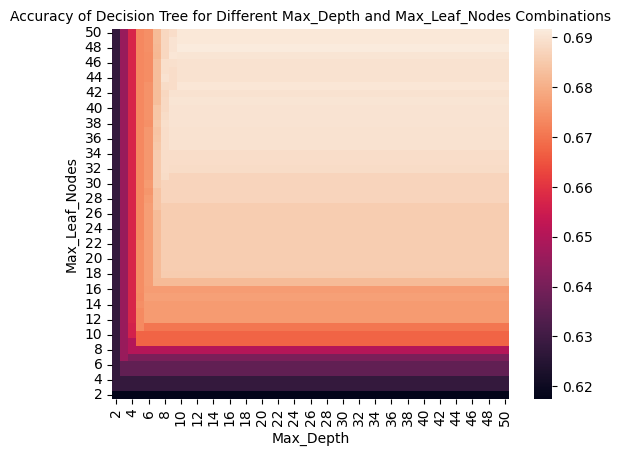

In [ ]:
ax = sns.heatmap(comb)
plt.title('Accuracy of Decision Tree for Different Max_Depth and Max_Leaf_Nodes Combinations', fontsize=10)
ax.invert_yaxis()
plt.xlabel('Max_Depth')
plt.ylabel('Max_Leaf_Nodes')

plt.show()

##**New Model**

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.4, random_state=25)
clf = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=41)
clf = clf.fit(X_train_1, y_train_1)
#max_depth=8, max_leaf_nodes=48

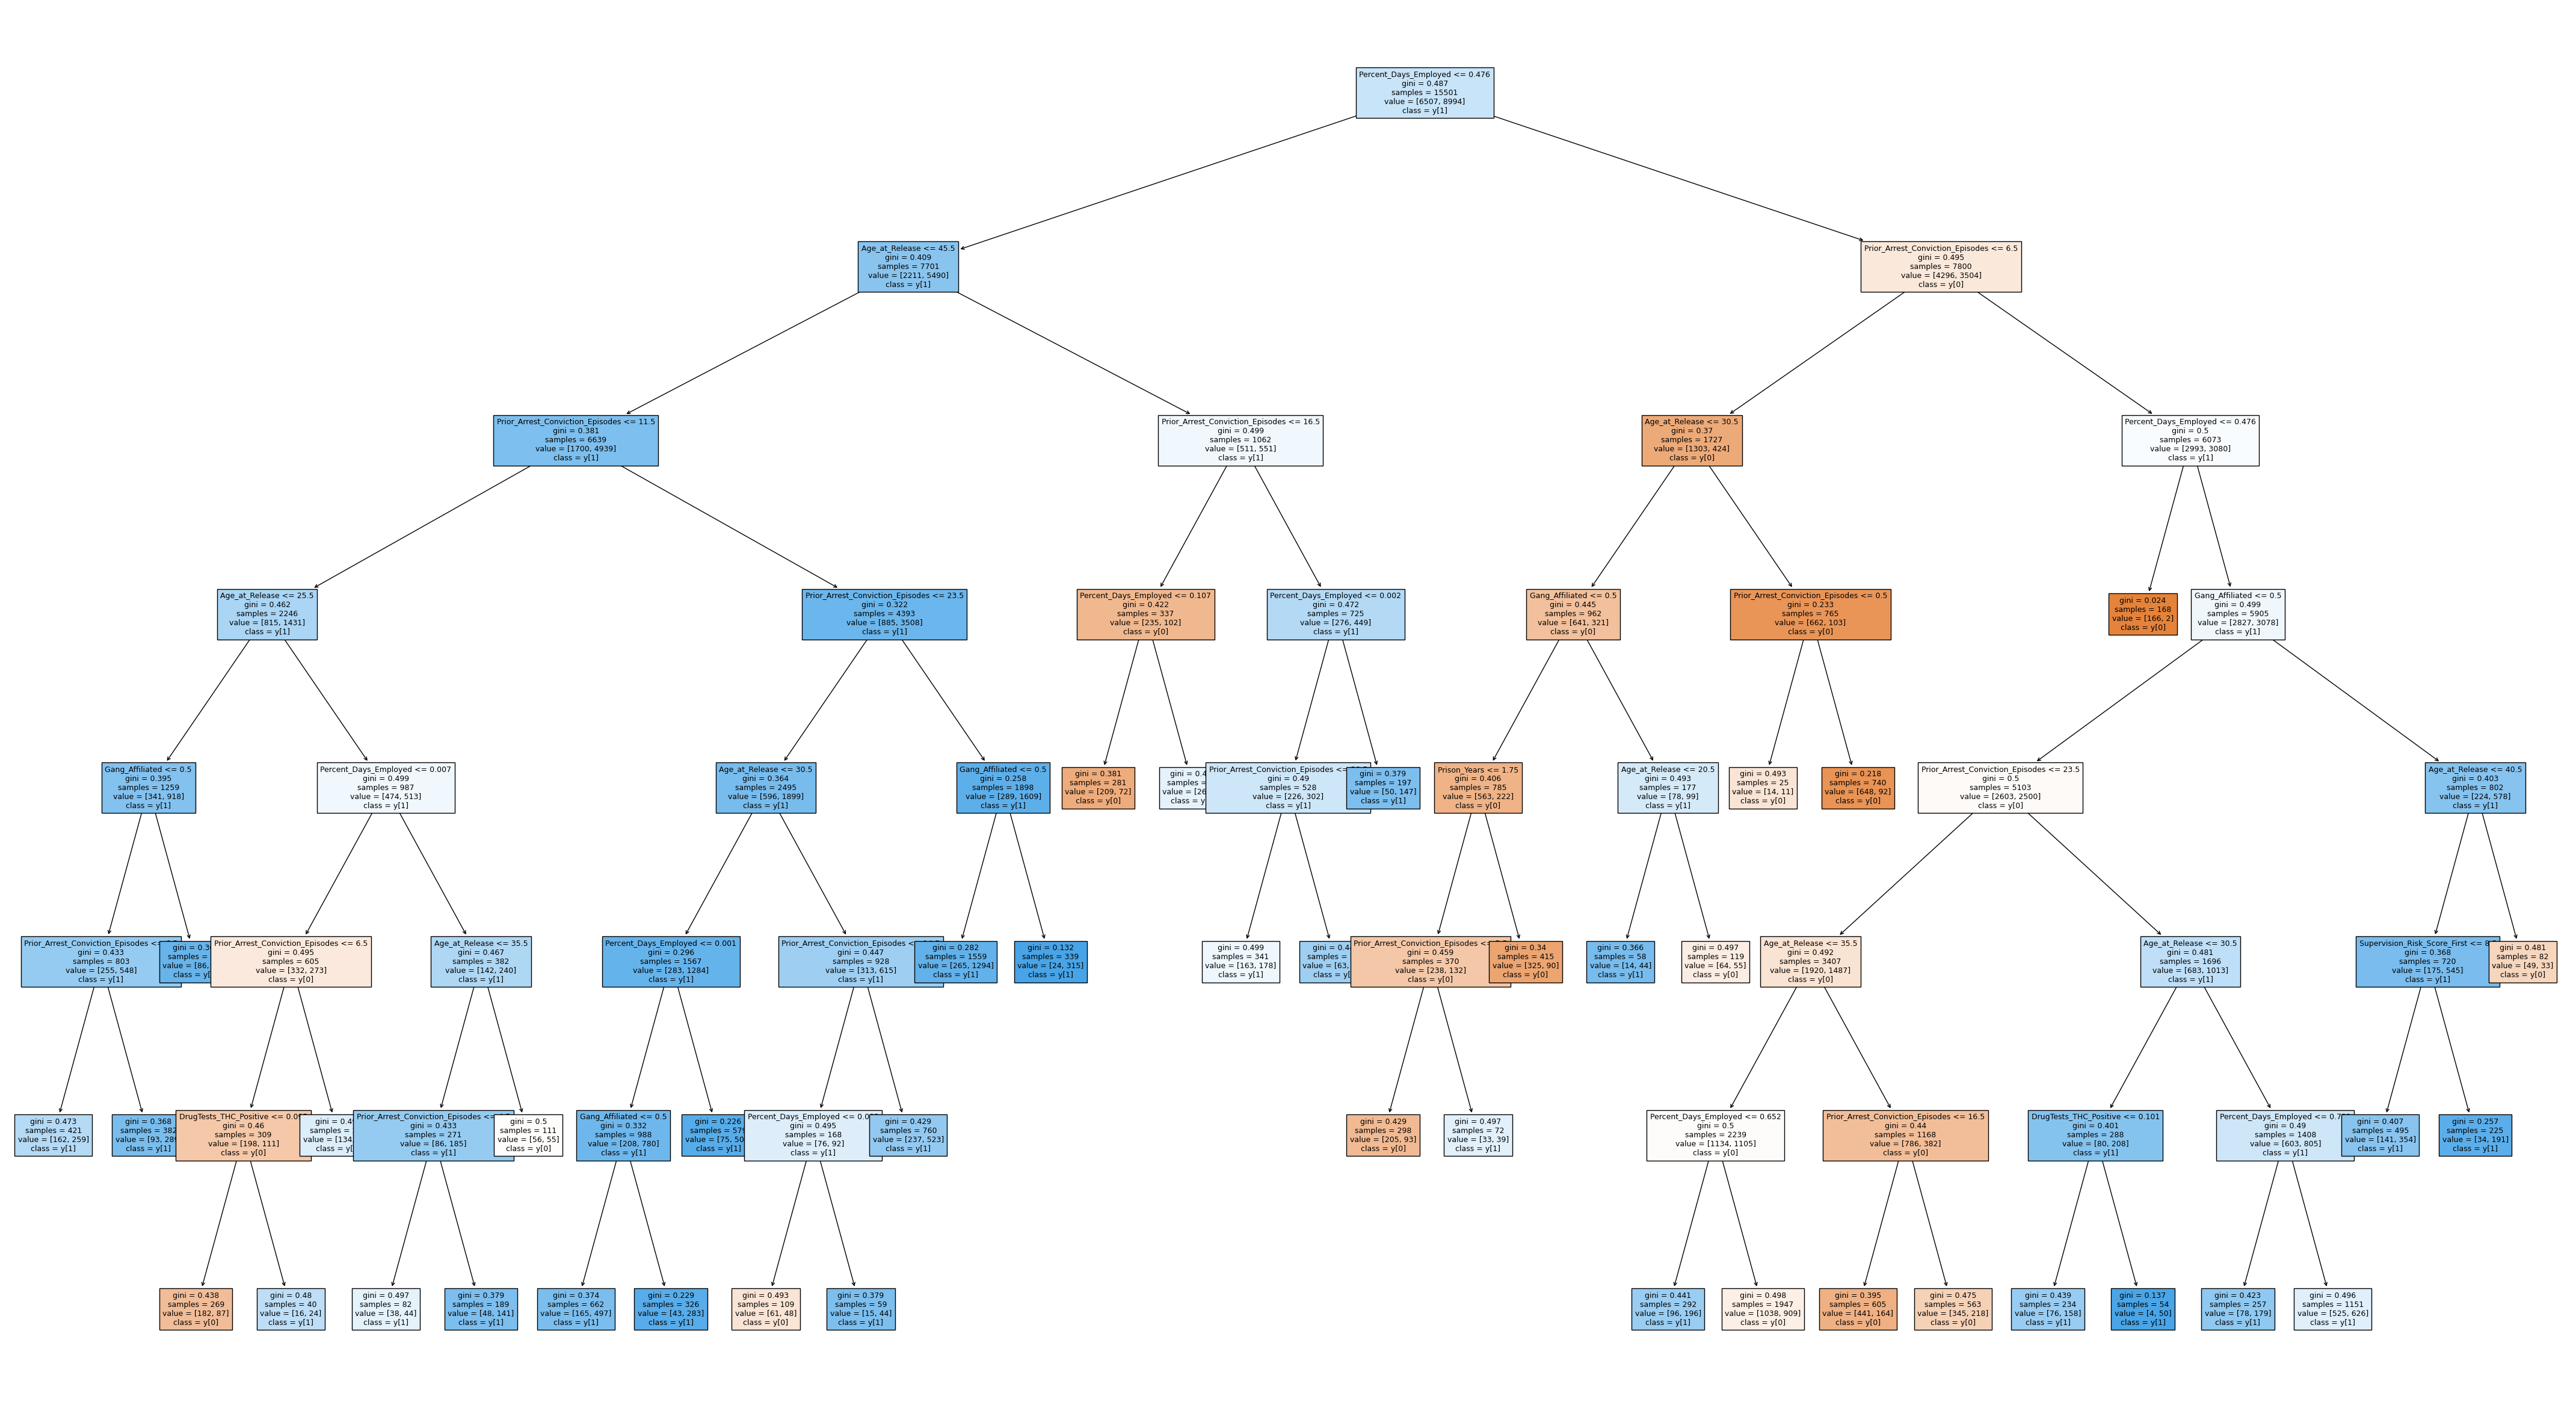

In [ ]:
plt.figure(figsize=(55, 30))
tree.plot_tree(clf, max_depth=8, feature_names=['Age_at_Release','Gang_Affiliated','Supervision_Risk_Score_First','Supervision_Level_First',
'Education_Level','Prison_Years','Condition_MH_SA','DrugTests_THC_Positive', 'Percent_Days_Employed','Prior_Arrest_Conviction_Episodes'],
               class_names = True, filled=True, fontsize=9)
plt.show()

In [ ]:
p = clf.predict(X_test_1)
print('Accuracy:',metrics.accuracy_score(y_test_1, p))

Accuracy: 0.6792142442423069


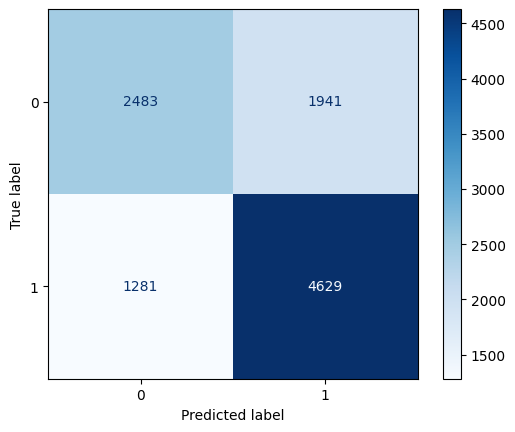

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_1, y_test_1, cmap=plt.cm.Blues)

##**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#defining parameter space
parameters = {'max_depth': (2, 4, 6, 8, 10, 12, 14, 16, 18, 20),
              'min_samples_split': (2, 4, 6, 8, 10, 12, 14, 16, 18, 20),
              'random_state': (10, 20, 30, 40, 50),
              'max_leaf_nodes': (5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55),
             }

In [ ]:
#randomized search
rand = RandomizedSearchCV(DecisionTreeClassifier(random_state=25), param_distributions = parameters, scoring='accuracy',
                                      cv = 5, verbose =True)

In [ ]:
#fitting randomizer to training data
rand.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=25),
                   param_distributions={'max_depth': (2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20),
                                        'max_leaf_nodes': (5, 10, 15, 20, 25,
                                                           30, 35, 40, 45, 50,
                                                           55),
                                        'min_samples_split': (2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20),
                                        'random_state': (10, 20, 30, 40, 50)},
                   scoring='accuracy', verbose=True)

In [ ]:
rand.best_estimator_

DecisionTreeClassifier(max_depth=16, max_leaf_nodes=40, min_samples_split=20,
                       random_state=30)

In [ ]:
#model with tuned hyperparameters
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=30)
new_dtc = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=45, random_state=30)
new_dtc.fit(X_train5, y_train5)
pr = new_dtc.predict(X_test5)
print('Accuracy:',metrics.accuracy_score(y_test5, pr))

Accuracy: 0.7002967359050445


##**Train-Test-Val Split**

In [ ]:
# 70-15-15 train-test-val split
x_train, x_testval, Y_train, Y_testval = train_test_split(X, y, test_size=0.30)
x_test, x_val, Y_test, Y_val = train_test_split(x_testval, Y_testval, test_size = 0.5)

# building and fitting model
tr = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=48)
tr = tr.fit(x_train, Y_train)

In [ ]:
# Training accuracy
tr.score(x_train, Y_train)

0.707863304578633

In [ ]:
# predicting on validation data
val_predict = tr.predict(x_val)
val_acc = metrics.accuracy_score(Y_val, val_predict)
print('Validation Accuracy:', val_acc)

Validation Accuracy: 0.686016511867905


In [ ]:
# predicting on test data
test_predict = tr.predict(x_test)
test_acc = metrics.accuracy_score(Y_test, test_predict)
print('Testing Accuracy: ', test_acc)

Testing Accuracy:  0.7019354838709677


In [ ]:
# Plotting training and validation curves for different max depths
max_depths = np.arange(2, 21)
training_accuracy = []
validation_accuracy = []
for d in max_depths:
  dtc = DecisionTreeClassifier(max_depth=d)
  dtc = dtc.fit(x_train, Y_train)
  training_accuracy.append(dtc.score(x_train, Y_train))
  val_predict = dtc.predict(x_val)
  validation_accuracy.append(metrics.accuracy_score(Y_val, val_predict))

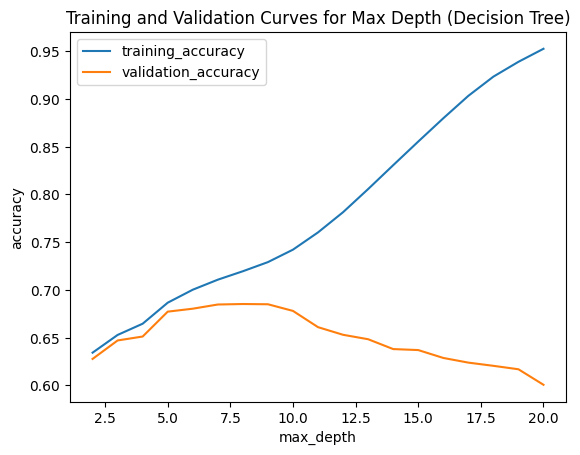

In [ ]:
plt.plot(max_depths, training_accuracy, label = "training_accuracy", linestyle="-")
plt.plot(max_depths, validation_accuracy, label = "validation_accuracy", linestyle="-")
plt.title("Training and Validation Curves for Max Depth (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
#effect of different train sizes on model accuracy
train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
test_sizes = [0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
validation_accuracy_size = []
for t in test_sizes:
  x_train2, x_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size=t, random_state=10)
  dtc = DecisionTreeClassifier(random_state=10)
  dtc = dtc.fit(x_train2, Y_train2)
  test_predict = dtc.predict(x_test2)
  validation_accuracy_size.append(metrics.accuracy_score(Y_test2, test_predict))

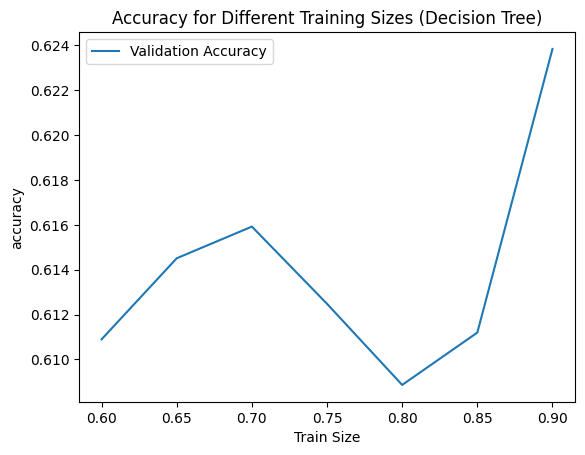

In [ ]:
plt.plot(train_sizes, validation_accuracy_size, label = "Validation Accuracy", linestyle="-")
plt.title('Accuracy for Different Training Sizes (Decision Tree)')
plt.xlabel("Train Size")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), X, y, cv=5,
                                                        scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50), verbose=True)

[learning_curve] Training set sizes: [  206   624  1041  1459  1876  2294  2712  3129  3547  3964  4382  4800
  5217  5635  6052  6470  6887  7305  7723  8140  8558  8975  9393  9810
 10228 10646 11063 11481 11898 12316 12734 13151 13569 13986 14404 14821
 15239 15657 16074 16492 16909 17327 17744 18162 18580 18997 19415 19832
 20250 20668]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.2s finished


In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

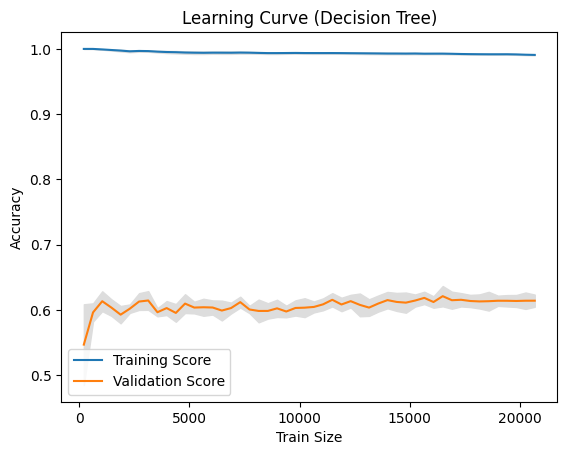

In [ ]:
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')


plt.title('Learning Curve (Decision Tree)')
plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.legend(loc ='best')

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss

In [ ]:
#Splitting into features and label
X = df.drop('Recidivism_Within_3years', 1) #Features
y = df[['Recidivism_Within_3years']] #Label

<ipython-input-28-1e6b2531d1d0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Recidivism_Within_3years', 1) #Features


In [ ]:
#70-15-15 train-test-val split
x_train3, x_testval3, Y_train3, Y_testval3 = train_test_split(X, y, test_size=0.30, stratify=y)
x_test3, x_val3, Y_test3, Y_val3 = train_test_split(x_testval3, Y_testval3, test_size = 0.5)
Y_train3 = np.ravel(Y_train3)
Y_test3 = np.ravel(Y_test3)
Y_val3 = np.ravel(Y_val3)

In [ ]:
#n_estimators=100, max_depth=10, random_state=25
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=25)
rf.fit(x_train3, Y_train3)
rf_val_pred = rf.predict(x_val3)
print('Validation Accuracy: ', metrics.accuracy_score(Y_val3, rf_val_pred))
rf_test_pred = rf.predict(x_test3)
print('Testing Accuracy: ', metrics.accuracy_score(Y_test3, rf_test_pred))

Validation Accuracy:  0.7100103199174407
Testing Accuracy:  0.7052903225806452


In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5), dpi=900)
for i in range(0, 3):
    tree.plot_tree(rf.estimators_[i],
                   max_depth=2,
                   feature_names = ['Age_at_Release','Gang_Affiliated','Supervision_Risk_Score_First','Supervision_Level_First',
'Education_Level','Prison_Years','Condition_MH_SA','DrugTests_THC_Positive', 'Percent_Days_Employed','Prior_Arrest_Conviction_Episodes'],
                   class_names=True,
                   impurity=True,
                   filled = True,
                   fontsize=3,
                   ax = axes[i]);

##**Randomized Search**

In [ ]:
param_rf = {'n_estimators': np.arange(1, 201),
            'max_depth': np.arange(1,21),
            'min_samples_split': np.arange(1, 51)
}

In [ ]:
randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_rf, scoring='accuracy',
                                      cv = 5, verbose =True)

In [ ]:
randomized_search.fit(x_train3, Y_train3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'n_estimators': array([  1,   2,   3,...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200])},
                   scoring='accuracy', verbose=True)

In [ ]:
randomized_search.best_estimator_

RandomForestClassifier(max_depth=14, min_samples_split=42, n_estimators=324,
                       random_state=4)

In [ ]:
new_rf = RandomForestClassifier(max_depth=17, min_samples_split=22, n_estimators=117,random_state=25)
new_rf.fit(x_train3, Y_train3)

RandomForestClassifier(max_depth=17, min_samples_split=22, n_estimators=117,
                       random_state=25)

In [ ]:
new_rf_pred_val = new_rf.predict(x_val3)
print('Validation Accuracy: ', metrics.accuracy_score(Y_val3, new_rf_pred_val))
new_rf_pred_test = new_rf.predict(x_test3)
print('Testing Accuracy: ', metrics.accuracy_score(Y_test3, new_rf_pred_test))

Validation Accuracy:  0.7035603715170279
Testing Accuracy:  0.7163870967741935


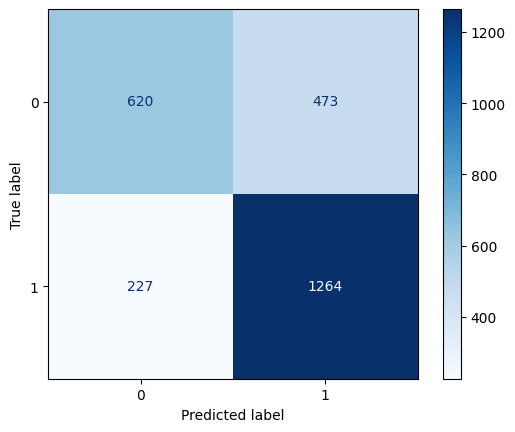

In [ ]:
ConfusionMatrixDisplay.from_estimator(new_rf, x_test4, Y_test4, cmap=plt.cm.Blues)

In [ ]:
precision = 1217/(1217 + 495)
recall = 1217/(1217+274)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  0.7108644859813084
Recall:  0.8162307176391683


##**Plotting Validation and Training Curves for Hyperparameters**

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range=np.arange(2, 30, 2)

In [ ]:
train_score, test_score = validation_curve(new_rf,
                                X, np.ravel(y), param_name="max_depth", param_range=param_range,
                                cv=5, scoring="accuracy")

In [ ]:
train_mean = np.mean(train_score, axis=1) #axis=1
test_mean = np.mean(test_score, axis=1)

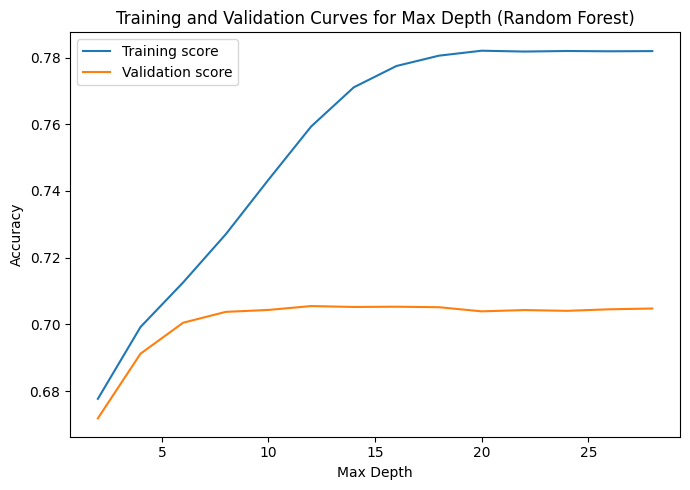

In [ ]:
plt.subplots(1, figsize=(7,5))
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Validation score")
plt.title("Training and Validation Curves for Max Depth (Random Forest)")
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
train_sizes = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
test_sizes = [0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
validation_accuracy_size = []
for t in test_sizes:
  x_train2, x_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size=t, random_state=14)
  dtc = RandomForestClassifier(random_state=14)
  dtc = dtc.fit(x_train2, np.ravel(Y_train2))
  test_predict = dtc.predict(x_test2)
  validation_accuracy_size.append(metrics.accuracy_score(Y_test2, test_predict))

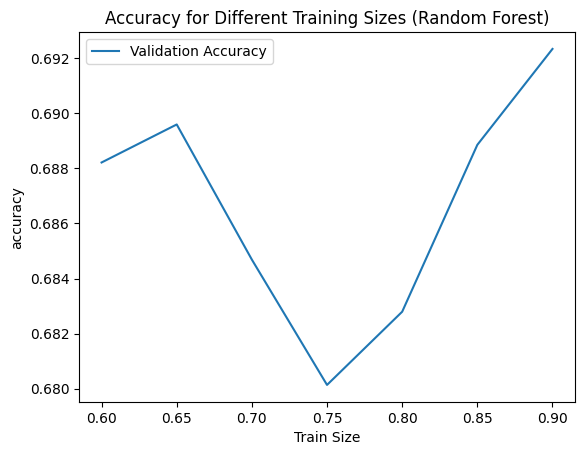

In [ ]:
plt.plot(train_sizes, validation_accuracy_size, label = "Validation Accuracy", linestyle="-")
plt.title('Accuracy for Different Training Sizes (Random Forest)')
plt.xlabel("Train Size")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##**Bayesian Search**

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
search_space = {
    'max_depth': (2, 50),
    'n_estimators': (100, 400),
    'min_samples_split': (2,40),
    'random_state': (2, 42)
}

In [ ]:
bayes_search = BayesSearchCV(RandomForestClassifier(), search_space, n_iter=50, scoring='accuracy', cv=5)

In [ ]:
bayes_search.fit(x_train3, Y_train3)

In [ ]:
bayes_search.best_estimator_

In [ ]:
rf3 = RandomForestClassifier(max_depth=42, min_samples_split=39, n_estimators=185, random_state=14)

In [ ]:
rf3.fit(x_train3, Y_train3)

RandomForestClassifier(max_depth=42, min_samples_split=39, n_estimators=185,
                       random_state=14)

In [ ]:
rf3_pred_test = rf3.predict(x_test4)
print('Accuracy: ', metrics.accuracy_score(Y_test4, rf3_pred_test))

Accuracy:  0.6993034055727554


##**Grid Search**

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(X, y, test_size=0.15)
b_train = np.ravel(b_train)
b_test=np.ravel(b_test)

In [ ]:
search_space2 = {
    'max_depth': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400],
    'min_samples_split': [15, 20, 25, 30, 40],
    'random_state': [10, 20, 30, 40],
    'max_samples': (0, 1)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid=search_space2,
                  scoring = 'accuracy',
                  cv=5,
                  verbose=4)

In [ ]:
grid_search.fit(a_train, b_train)

In [ ]:
new_rff = RandomForestClassifier(max_depth=9, n_estimators=500, random_state=25)
new_rff.fit(a_train, b_train)

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=25)

In [ ]:
new_rff_pred_test = new_rff.predict(a_test)
print('Testing Accuracy: ', metrics.accuracy_score(b_test, new_rff_pred_test))

Testing Accuracy:  0.7123323013415893


In [ ]:
comb2 = pd.DataFrame(np.zeros((15, 49)), columns=np.arange(2, 51))

In [ ]:
comb2.set_index(keys=np.arange(50, 401, 25), inplace=True)

In [ ]:
#Splitting into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
#looking at different combinations of max leaf node and max depth
n_estimators = np.arange(50, 401, 25)
max_depth = np.arange(2, 51)
row = 50
col = 2

for n in n_estimators:
  for depth in max_depth:
    mod = RandomForestClassifier(max_depth=depth, random_state=25, n_estimators=n)
    mod.fit(X_train, y_train)
    prediction = mod.predict(X_test)
    acc = metrics.accuracy_score(y_test, prediction)
    comb2.at[row, col] = acc
    col+=1
  col = 2
  row+=25

In [ ]:
mods = RandomForestClassifier(max_depth=9, n_estimators=275, random_state=25)
mods.fit(X_train, y_train)
prediction = mods.predict(X_test)
acc = metrics.accuracy_score(y_test, prediction)
print(acc)

0.707263578893046


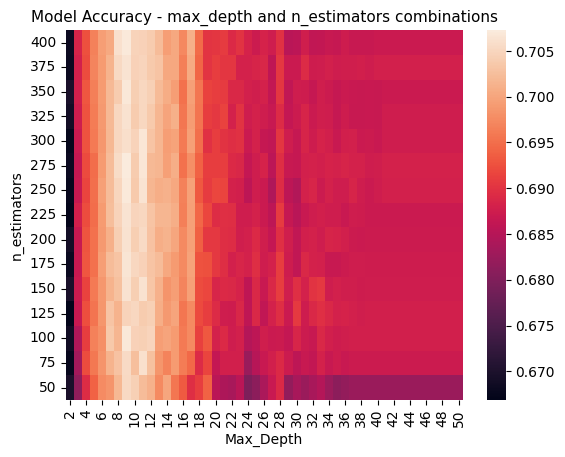

In [ ]:
ax = sns.heatmap(comb2)
plt.title('Model Accuracy - max_depth and n_estimators combinations', fontsize=11)
ax.invert_yaxis()
plt.xlabel('Max_Depth')
plt.ylabel('n_estimators')

plt.show()